In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style(style = 'whitegrid')

In [2]:
df=pd.read_csv('loan_data.csv')
nrow, ncol = df.shape
nrow, ncol

(9578, 14)

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


In [5]:
df_cat = df.select_dtypes(include = 'object').copy()
df_cat.head()

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card


In [6]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [7]:
df_cat['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [8]:
df_cat['purpose'].nunique()

7

In [9]:
df_cat['purpose'].isnull().sum()

0

In [10]:
df_cat['purpose'].isnull().sum()/ nrow

#Let's multiple by 100 and keep only 1 decimal places
(df_cat['purpose'].isnull().sum()/ nrow).round(3)*100

0.0

<AxesSubplot:xlabel='purpose', ylabel='count'>

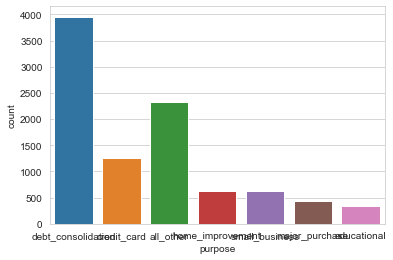

In [11]:
sns.countplot(data = df, x = 'purpose')

<AxesSubplot:xlabel='purpose', ylabel='not.fully.paid'>

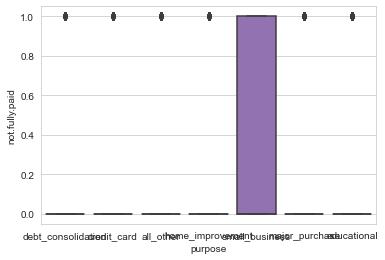

In [12]:
sns.boxplot(data = df, x='purpose', y='not.fully.paid')

<AxesSubplot:xlabel='purpose', ylabel='not.fully.paid'>

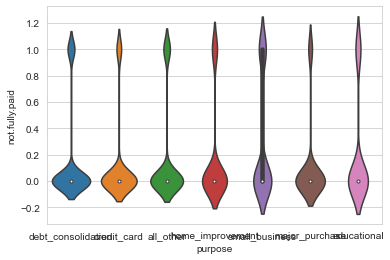

In [13]:
sns.violinplot(data = df, x='purpose', y='not.fully.paid')

<AxesSubplot:xlabel='purpose', ylabel='not.fully.paid'>

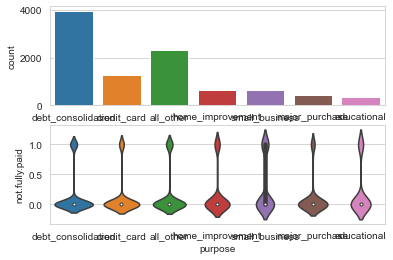

In [14]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = df, x = 'purpose', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.violinplot(data = df, x='purpose', y='not.fully.paid' , ax = ax2)

<AxesSubplot:xlabel='pub.rec', ylabel='count'>

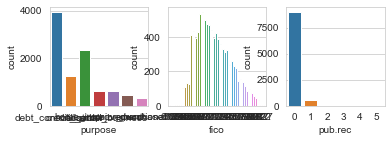

In [15]:
fig = plt.figure()

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = df, x = 'purpose', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = df, x = 'fico', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = df, x = 'pub.rec', ax=ax3)

<AxesSubplot:xlabel='purpose', ylabel='count'>

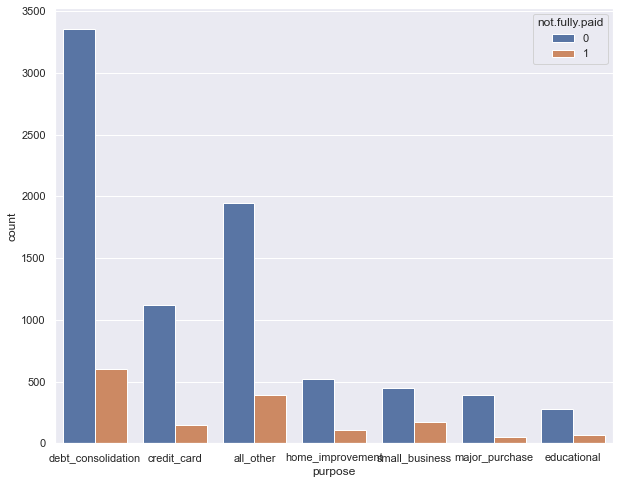

In [16]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(data = df, x='purpose', hue='not.fully.paid')

<AxesSubplot:ylabel='pub.rec'>

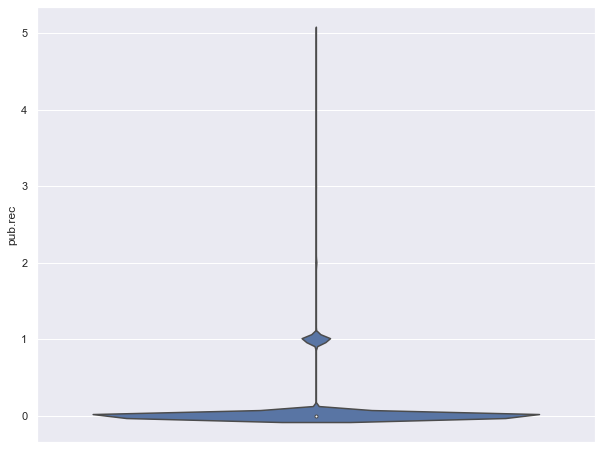

In [17]:
sns.violinplot(y=df["pub.rec"], hue=df["not.fully.paid"])

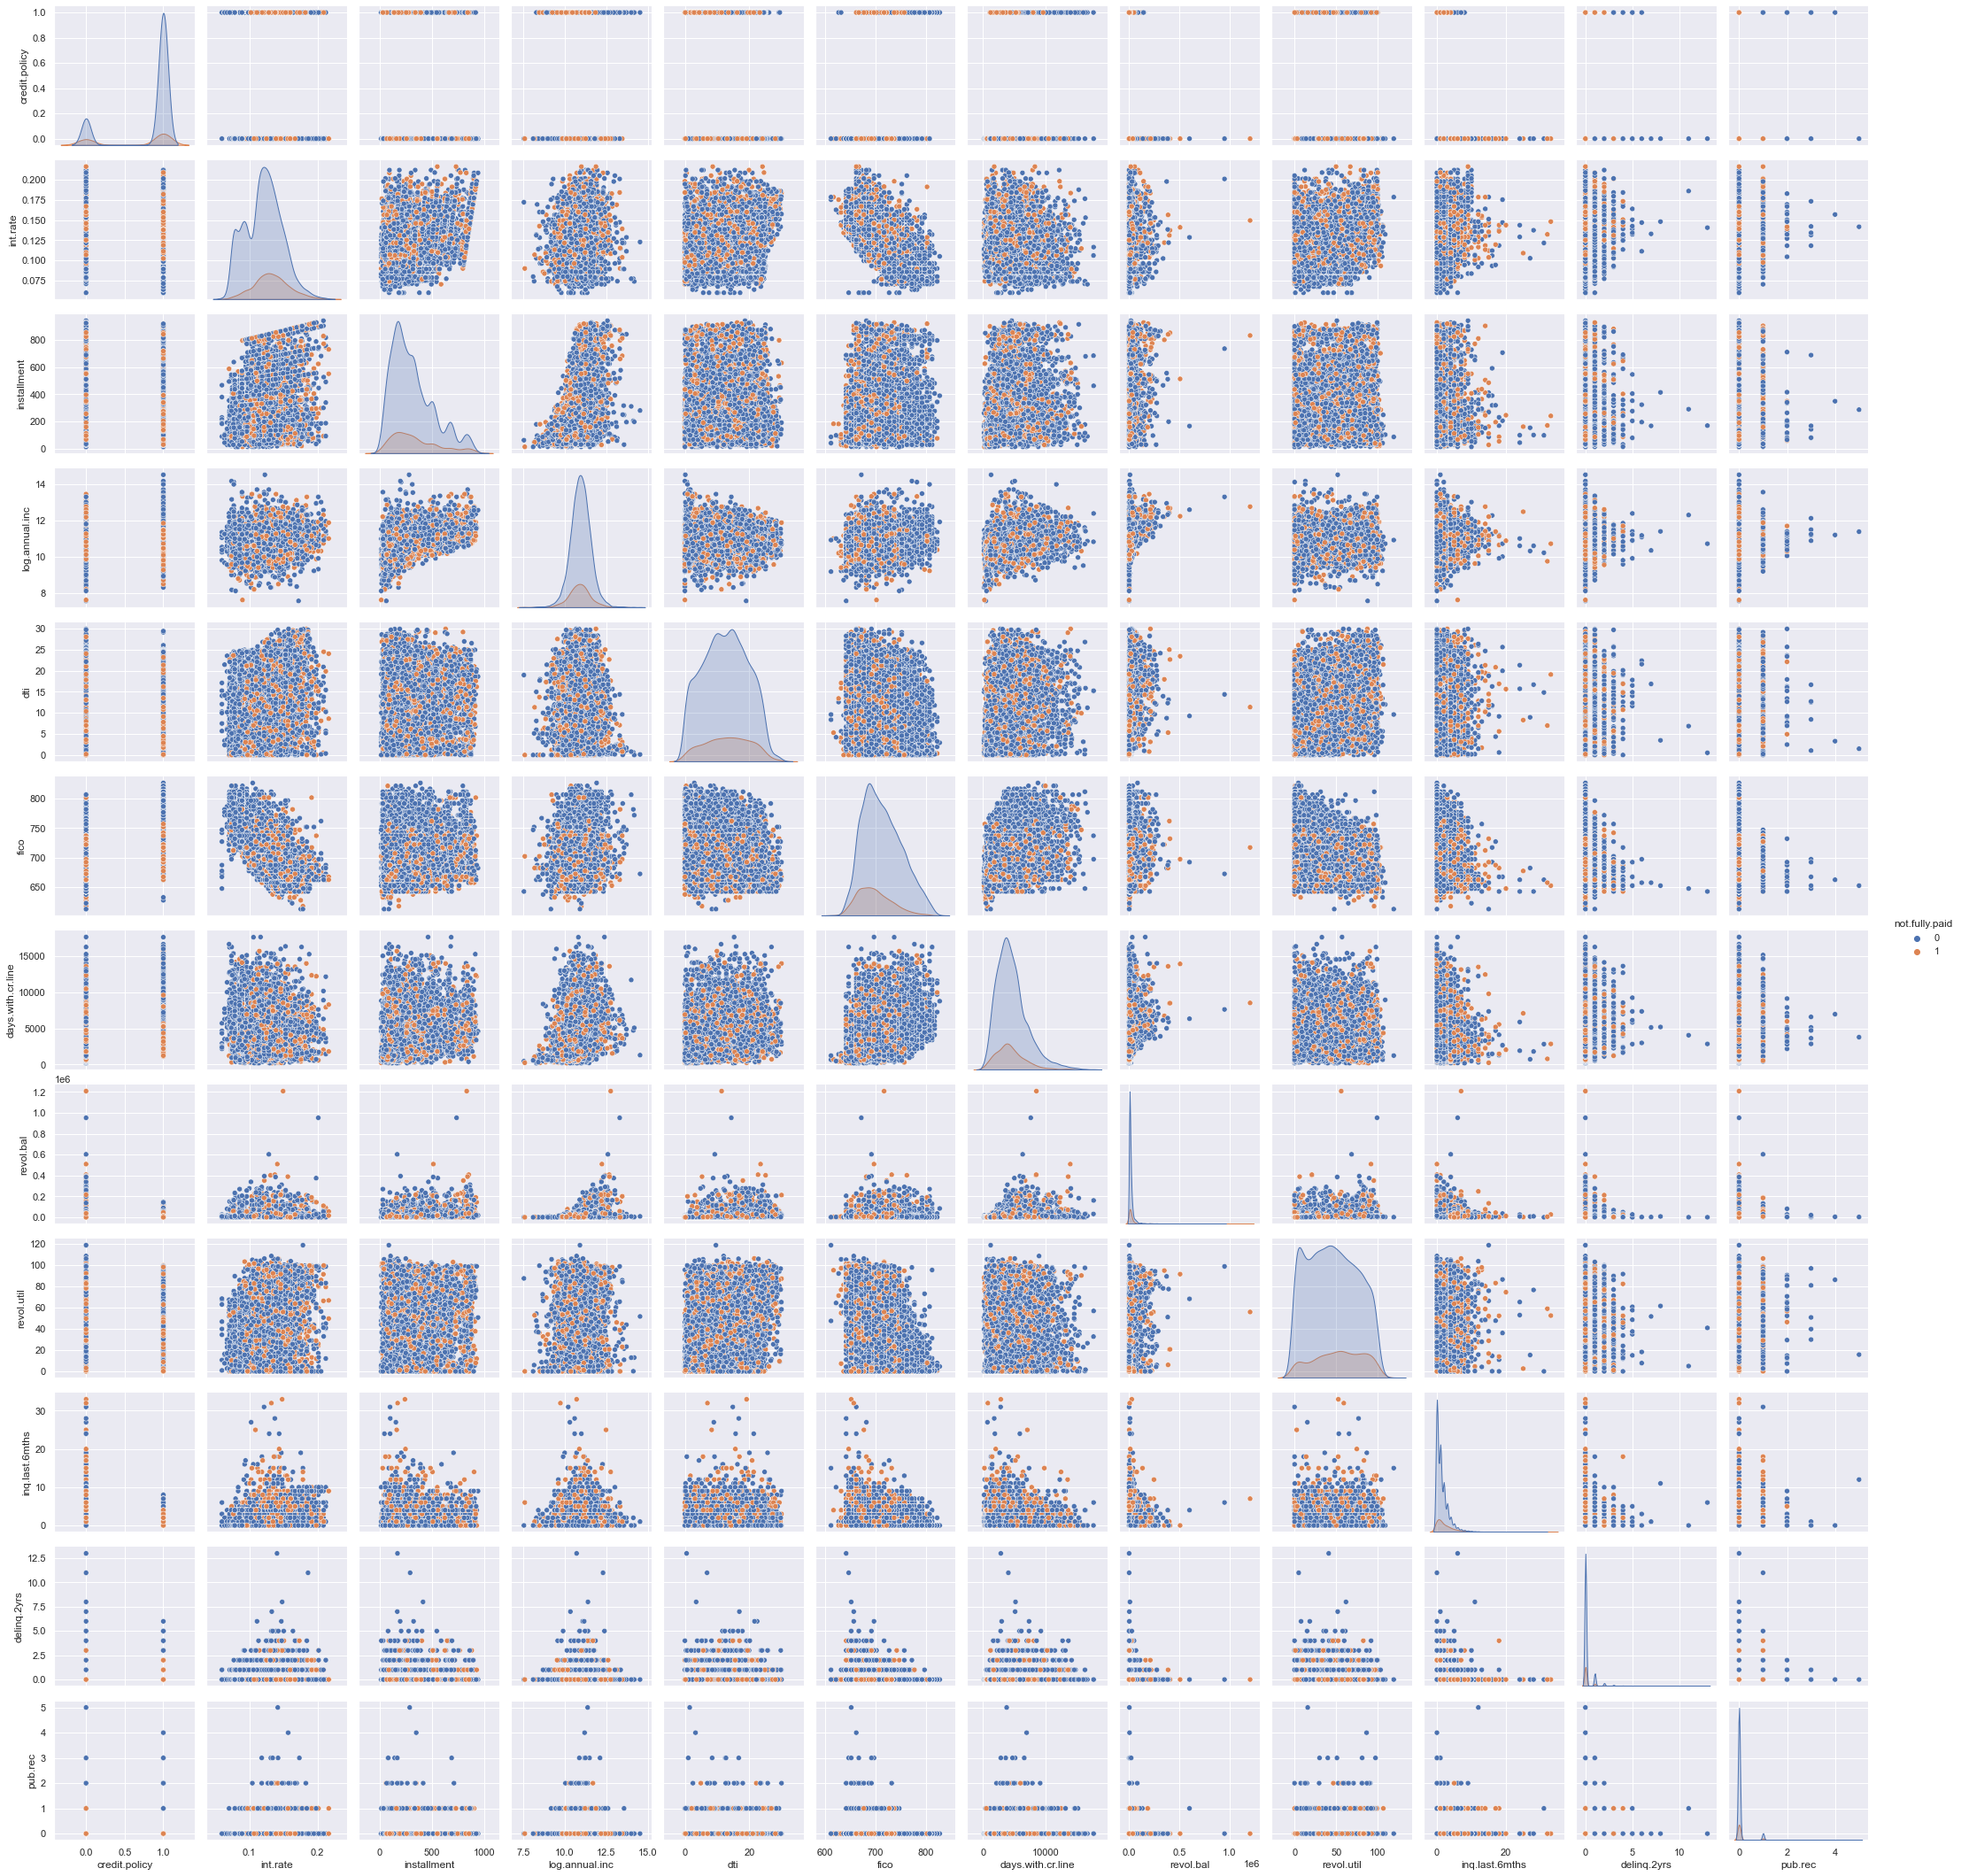

In [18]:
sns.pairplot(data=df, hue='not.fully.paid')

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lb_make = LabelEncoder()
df["purpose"] = lb_make.fit_transform(df["purpose"])
df[["purpose"]].head()

,purpose
0,2
1,1
2,2
3,2
4,1


In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [22]:
df_x=pd.read_csv('input.csv', delimiter=',')
df_y=pd.read_csv('output.csv', delimiter=',')

df_x = df_x.astype('float32')
df_y = df_y.astype('float32')

In [23]:
print(df_x.shape[0], 'inputs')
print(df_y.shape[0], 'labels')

9577 inputs
9577 labels


In [24]:
train_size = 0.75

from math import floor, ceil

train_cnt = floor(df_x.shape[0] * train_size)
x_train = df_x[0: train_cnt]
y_train = df_y[0: train_cnt]
x_test = df_x[train_cnt:]
y_test = df_y[train_cnt:]

In [25]:
print(np.random.seed(777))

None


In [26]:
model = Sequential()
model.add(Dense(12, input_dim=18, activation='relu'))
model.add(Dense(18, activation= 'relu'))
model.add(Dense(2, activation= 'sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train,batch_size=5,epochs=199,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Epoch 1/199
1437/1437 [==============================] - 14s 1ms/step - loss: 36.6438 - accuracy: 0.8059 - val_loss: 19.3821 - val_accuracy: 0.9269
Epoch 2/199
1437/1437 [==============================] - 2s 1ms/step - loss: 5.0598 - accuracy: 0.8985 - val_loss: 5.6608 - val_accuracy: 0.9278
Epoch 3/199
1437/1437 [==============================] - 2s 1ms/step - loss: 3.4684 - accuracy: 0.9017 - val_loss: 4.4976 - val_accuracy: 0.9253
Epoch 4/199
1437/1437 [==============================] - 2s 1ms/step - loss: 1.8570 - accuracy: 0.9122 - val_loss: 4.8071 - val_accuracy: 0.9361
Epoch 5/199
1437/1437 [==============================] - 2s 1ms/step - loss: 1.8103 - accuracy: 0.9110 - val_loss: 2.6060 - val_accuracy: 0.9370
Epoch 6/199
1437/1437 [==============================] - 2s 1ms/step - loss: 1.2281 - accuracy: 0.9124 - val_loss: 9.8803 - val_accuracy: 0.9374
Epoch 7/199
1437/1437 [==============================] - 3s 2ms/step - loss: 2.0837 - accuracy: 0.9100 - val_loss: 1.3372 - val

1437/1437 [==============================] - 2s 1ms/step - loss: 0.2432 - accuracy: 0.9341 - val_loss: 0.4534 - val_accuracy: 0.9374
Epoch 58/199
1437/1437 [==============================] - 2s 2ms/step - loss: 0.2322 - accuracy: 0.9382 - val_loss: 0.4408 - val_accuracy: 0.9374
Epoch 59/199
1437/1437 [==============================] - 2s 1ms/step - loss: 0.2384 - accuracy: 0.9359 - val_loss: 0.4661 - val_accuracy: 0.9374
Epoch 60/199
1437/1437 [==============================] - 2s 1ms/step - loss: 0.2495 - accuracy: 0.9317 - val_loss: 0.4545 - val_accuracy: 0.9374
Epoch 61/199
1437/1437 [==============================] - 2s 2ms/step - loss: 0.2541 - accuracy: 0.9299 - val_loss: 0.4859 - val_accuracy: 0.9374
Epoch 62/199
1437/1437 [==============================] - 1s 1ms/step - loss: 0.2446 - accuracy: 0.9336 - val_loss: 0.4550 - val_accuracy: 0.9374
Epoch 63/199
1437/1437 [==============================] - 1s 1ms/step - loss: 0.2460 - accuracy: 0.9330 - val_loss: 0.4413 - val_accuracy

1437/1437 [==============================] - 1s 1ms/step - loss: 0.2393 - accuracy: 0.9355 - val_loss: 0.3636 - val_accuracy: 0.9374
Epoch 114/199
1437/1437 [==============================] - 1s 1ms/step - loss: 0.2387 - accuracy: 0.9358 - val_loss: 0.3639 - val_accuracy: 0.9374
Epoch 115/199
1437/1437 [==============================] - 2s 2ms/step - loss: 0.2564 - accuracy: 0.9290 - val_loss: 0.3690 - val_accuracy: 0.9374
Epoch 116/199
1437/1437 [==============================] - 2s 1ms/step - loss: 0.2446 - accuracy: 0.9335 - val_loss: 0.3701 - val_accuracy: 0.9374
Epoch 117/199
1437/1437 [==============================] - 1s 1ms/step - loss: 0.2292 - accuracy: 0.9393 - val_loss: 0.3674 - val_accuracy: 0.9374
Epoch 118/199
1437/1437 [==============================] - 1s 1ms/step - loss: 0.2507 - accuracy: 0.9312 - val_loss: 0.3655 - val_accuracy: 0.9374
Epoch 119/199
1437/1437 [==============================] - 1s 1ms/step - loss: 0.2361 - accuracy: 0.9367 - val_loss: 0.3548 - val_ac

Epoch 169/199
1437/1437 [==============================] - 1s 997us/step - loss: 0.2518 - accuracy: 0.9308 - val_loss: 0.3211 - val_accuracy: 0.9374
Epoch 170/199
1437/1437 [==============================] - 1s 1ms/step - loss: 0.2441 - accuracy: 0.9337 - val_loss: 0.3208 - val_accuracy: 0.9374
Epoch 171/199
1437/1437 [==============================] - 2s 1ms/step - loss: 0.2373 - accuracy: 0.9362 - val_loss: 0.3207 - val_accuracy: 0.9374
Epoch 172/199
1437/1437 [==============================] - 2s 1ms/step - loss: 0.2420 - accuracy: 0.9345 - val_loss: 0.3197 - val_accuracy: 0.9374
Epoch 173/199
1437/1437 [==============================] - 1s 1ms/step - loss: 0.2307 - accuracy: 0.9387 - val_loss: 0.3173 - val_accuracy: 0.9378
Epoch 174/199
1437/1437 [==============================] - 1s 1ms/step - loss: 0.2441 - accuracy: 0.9337 - val_loss: 0.3191 - val_accuracy: 0.9374
Epoch 175/199
1437/1437 [==============================] - 1s 1ms/step - loss: 0.2407 - accuracy: 0.9350 - val_loss:

In [29]:
scores_test = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

75/75 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.9374

accuracy: 93.74%
